In [1]:
# get dataset
!curl -L -o mobile-price-classification.zip\
  https://www.kaggle.com/api/v1/datasets/download/iabhishekofficial/mobile-price-classification
!unzip mobile-price-classification.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 72340  100 72340    0     0  40103      0  0:00:01  0:00:01 --:--:--  359k
Archive:  mobile-price-classification.zip
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: test.csv                
  inflating: train.csv               


In [2]:
#imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#sklearn preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


from sklearn.linear_model import LinearRegression,Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.ensemble import VotingRegressor, StackingRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.model_selection import GridSearchCV, StratifiedKFold



#metrices
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error, accuracy_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

import warnings
warnings.filterwarnings("ignore")

In [3]:
!pip install ydata-profiling

# 1. Data Loading (5 Marks)
Load the chosen dataset into your environment and display the first few rows along with the shape to verify correctness.


In [4]:
df = pd.read_csv("./train.csv")
print(df.shape)
df.head()

(2000, 21)


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


# 2. Data Preprocessing (10 Marks)
Perform and document at least 5 distinct preprocessing steps (e.g., handling missing values, encoding, scaling, outlier detection, feature engineering).


In [5]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df, title="Mobile Price Prediction", explorative = True)
profile.to_file("ydata.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 21/21 [00:00<00:00, 32.62it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
target = 'price_range'
all_cols = ['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range']

In [7]:
df.isnull().sum()
# no missing values


,0
battery_power,0
blue,0
clock_speed,0
dual_sim,0
fc,0
four_g,0
int_memory,0
m_dep,0
mobile_wt,0
n_cores,0


In [8]:
# one hot encoding

Y = df["price_range"]
X = df.drop(columns=["price_range"], axis=1)

cat_cols = ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']
num_cols = ['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep',
            'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram',
            'sc_h', 'sc_w', 'talk_time']

cat_df_encoded = pd.get_dummies(df, columns=cat_cols, dtype=int)
cat_df_encoded.head()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,...,dual_sim_0,dual_sim_1,four_g_0,four_g_1,three_g_0,three_g_1,touch_screen_0,touch_screen_1,wifi_0,wifi_1
0,842,2.2,1,7,0.6,188,2,2,20,756,...,1,0,1,0,1,0,1,0,0,1
1,1021,0.5,0,53,0.7,136,3,6,905,1988,...,0,1,0,1,0,1,0,1,1,0
2,563,0.5,2,41,0.9,145,5,6,1263,1716,...,0,1,0,1,0,1,0,1,1,0
3,615,2.5,0,10,0.8,131,6,9,1216,1786,...,1,0,1,0,0,1,1,0,1,0
4,1821,1.2,13,44,0.6,141,2,14,1208,1212,...,1,0,0,1,0,1,0,1,1,0


# 3. Pipeline Creation (10 Marks)
Construct a standard Machine Learning pipeline that integrates preprocessing and the model


In [9]:
num_transformer = Pipeline(
    steps = [
        ('imputer' , SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ]
)

cat_transformer = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OneHotEncoder(handle_unknown='ignore'))
    ]
)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('cat', cat_transformer, cat_cols)
    ]
)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# 4. Primary Model Selection (5 Marks)
Choose a suitable algorithm and justify why this specific model was selected for the dataset.


# 5. Model Training (10 Marks)
Train your selected model using the training portion of your dataset.


In [11]:
models = {
    "Logistic": LogisticRegression(multi_class='multinomial', max_iter=1000),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "RandomForest": RandomForestClassifier(n_estimators=100,random_state=42)
}

for name, model in models.items():
    pipe = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    pipe.fit(X_train, y_train)
    print(name, "Accuracy:", pipe.score(X_test, y_test))

Logistic Accuracy: 0.975
SVM Accuracy: 0.905
KNN Accuracy: 0.5775
RandomForest Accuracy: 0.8825


> Since the price_range class is balanced, I am considering accuracy as the deciding factor among the models. Based on the results, I am choosing the Logistic Regression model.

# 6. Cross-Validation (10 Marks)
Apply Cross-Validation  to assess robustness and report the average score with standard deviation.


In [12]:
pipe_lr = Pipeline([
    ('preprocessor', preprocessor),
    ('model', models["Logistic"])
])

cv_scores = cross_val_score(pipe_lr, X_train, y_train,cv=5, scoring='accuracy', n_jobs=-1)
print(cv_scores )
print(f"mean: {cv_scores.mean():.4f} \nstd {cv_scores.std():.4f}")

[0.95     0.95     0.946875 0.934375 0.971875]
mean: 0.9506 
std 0.0121


# 7. Hyperparameter Tuning (10 Marks)
Optimize your model using search methods displaying both the parameters tested and the best results found.


In [13]:
param_grid = {
    'model__C':[.01,.1, 1, 10,100],
    'model__penalty':['l2'],
    'model__solver':['lbfgs', 'saga']
}

grid_search = GridSearchCV(
  estimator=pipe_lr,
  param_grid=param_grid,
  cv = 5,
  scoring='accuracy',
  n_jobs = -1,
  verbose = 2
)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['battery_power',
                                                                          'clock_speed',
                                                                          'fc',
                                                                          'int_memory',
                                                                          'm_dep',
                                                                          'mobile_wt',
                                                                          'n_cores',
                                                                          'pc',
                                                                          'px_height',
                                                                          'px_width',
                                                                          'ram',
                                                                          'sc_h',
                                                                          'sc_w',
                                                                          'talk_time']),
                                                                        ('cat',
                                                                         Pipeline(ste...
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('encoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['blue',
                                                                          'dual_sim',
                                                                          'four_g',
                                                                          'three_g',
                                                                          'touch_screen',
                                                                          'wifi'])])),
                                       ('model',
                                        LogisticRegression(max_iter=1000,
                                                           multi_class='multinomial'))]),
             n_jobs=-1,
             param_grid={'model__C': [0.01, 0.1, 1, 10, 100],
                         'model__penalty': ['l2'],
                         'model__solver': ['lbfgs', 'saga']},
             scoring='accuracy', verbose=2)

In [14]:
print("all results")
results = pd.DataFrame(grid_search.cv_results_)
# Show relevant columns
results.columns
relevent_cols =  [
       'param_model__C', 'param_model__penalty', 'param_model__solver',
       'mean_test_score','std_test_score', ]

params_result = results[relevent_cols]
params_result


all results


,param_model__C,param_model__penalty,param_model__solver,mean_test_score,std_test_score
0,0.01,l2,lbfgs,0.775000,0.020252
1,0.01,l2,saga,0.775000,0.020252
2,0.10,l2,lbfgs,0.907500,0.015885
3,0.10,l2,saga,0.907500,0.015885
4,1.00,l2,lbfgs,0.950625,0.012087
5,1.00,l2,saga,0.950625,0.011075
6,10.00,l2,lbfgs,0.960000,0.011759
7,10.00,l2,saga,0.959375,0.011693
8,100.00,l2,lbfgs,0.964375,0.008524
9,100.00,l2,saga,0.963750,0.011285


In [15]:
print(f"best score: : {grid_search.best_score_}")
print(f"best params: : {grid_search.best_params_}")

best score: : 0.9643749999999999
best params: : {'model__C': 100, 'model__penalty': 'l2', 'model__solver': 'lbfgs'}


# 8. Best Model Selection (10 Marks)
Select  the final best-performing model based on the hyperparameter tuning results.


In [16]:
best_param = grid_search.best_params_
pipe_lr_best = Pipeline(
    steps=[
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(multi_class='multinomial',
                                 max_iter=1000,
                                 C=best_param['model__C'],
                                 penalty=best_param['model__penalty'],
                                 solver=best_param['model__solver']))

])


pipe_lr_best.fit(X_train, y_train)


y_pred = pipe_lr_best.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))



Test Accuracy: 0.9775


# 9. Model Performance Evaluation (10 Marks)
Evaluate the model on the test set and print comprehensive metrics suitable for the problem type.


Test F1-macro: 0.9771
Classification Report:

              precision    recall  f1-score   support

           0     1.0000    0.9524    0.9756       105
           1     0.9381    1.0000    0.9681        91
           2     0.9889    0.9674    0.9780        92
           3     0.9823    0.9911    0.9867       112

    accuracy                         0.9775       400
   macro avg     0.9773    0.9777    0.9771       400
weighted avg     0.9784    0.9775    0.9775       400



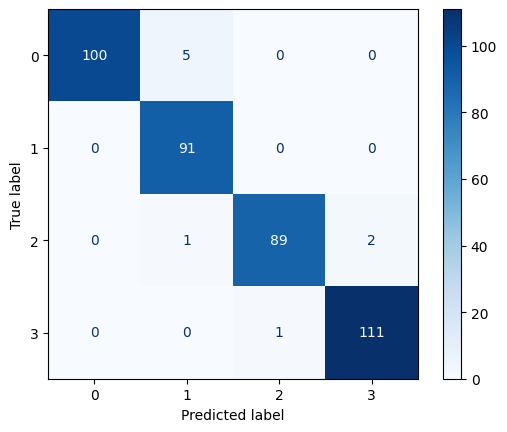

In [17]:
f1 = f1_score(y_test, y_pred, average='macro')
print(f"Test F1-macro: {f1:.4f}")

print("Classification Report:\n")
print(classification_report(y_test, y_pred, digits=4))


cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=[0,1,2,3])
disp.plot(cmap='Blues', values_format='d')

In [18]:
# save model
import pickle
filename=("model.pkl")
with open(filename, 'wb') as f:
  pickle.dump(pipe_lr_best, f)
